In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Machine Learning Coursera\\Datasets\\automobile_sales.csv')
df.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

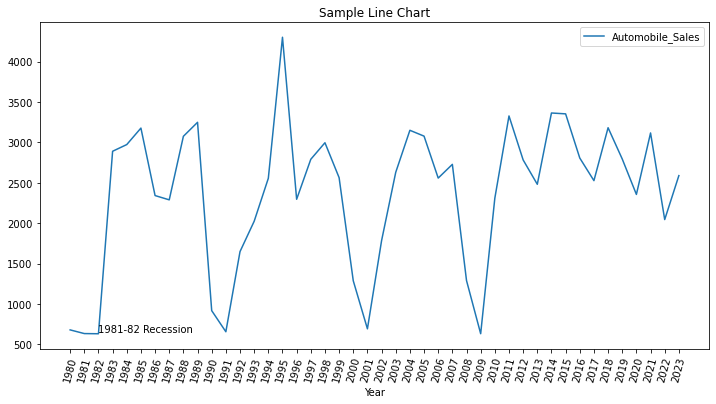

In [12]:
# Create a line chart
new_sale = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(12,6))
new_sale.plot(title='Sample Line Chart',kind='line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.legend()
plt.show()

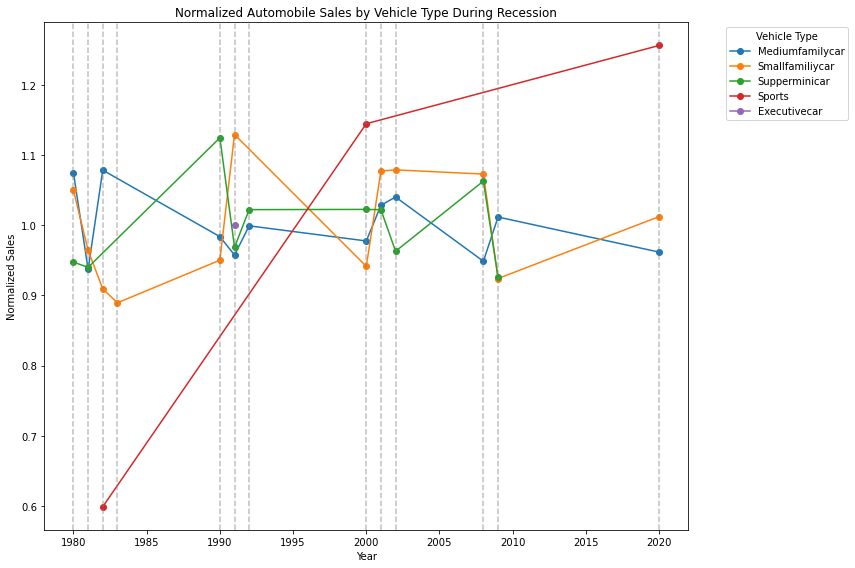

In [27]:
df = df[df['Recession']==1]

df_Mline = df.groupby(['Year','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()
# df_Mline.head()
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())
df_Mline.head()

# # Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# # Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# # Highlight recession years
recession_years = df['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()


In [31]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Machine Learning Coursera\\Datasets\\automobile_sales.csv')
df.head(2)


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


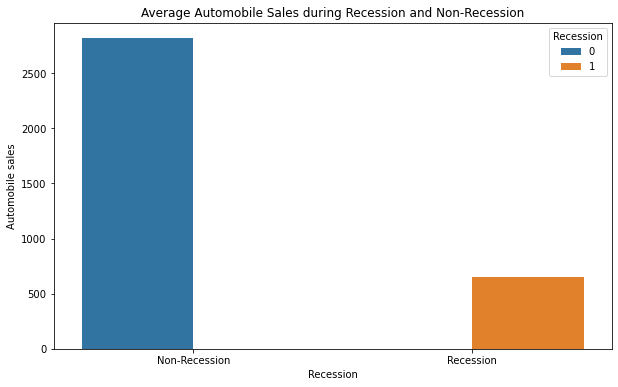

In [35]:
new_sale = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
# new_sale.head(5)
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_sale)
plt.xlabel('Recession')
plt.ylabel('Automobile sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

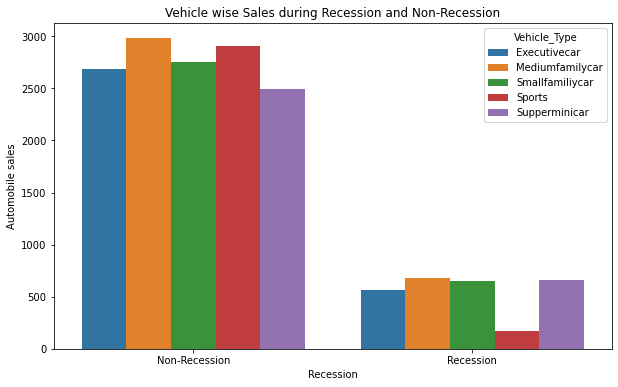

In [38]:
new_sale = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
new_sale.head(5)
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type',  data=new_sale)
plt.xlabel('Recession')
plt.ylabel('Automobile sales')
plt.title('Vehicle wise Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

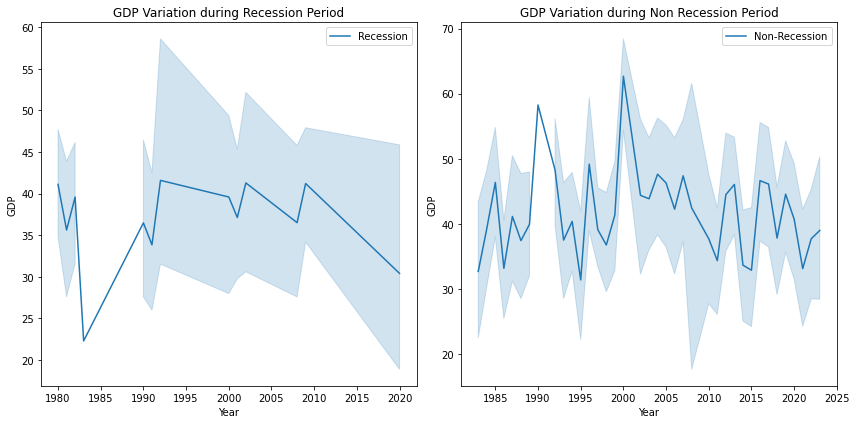

In [40]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2 ) # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')

plt.tight_layout()
plt.show()

  

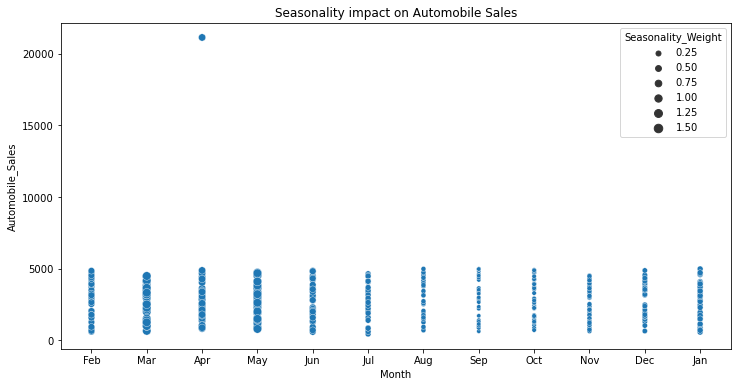

In [43]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

plt.figure(figsize=(12,6))

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

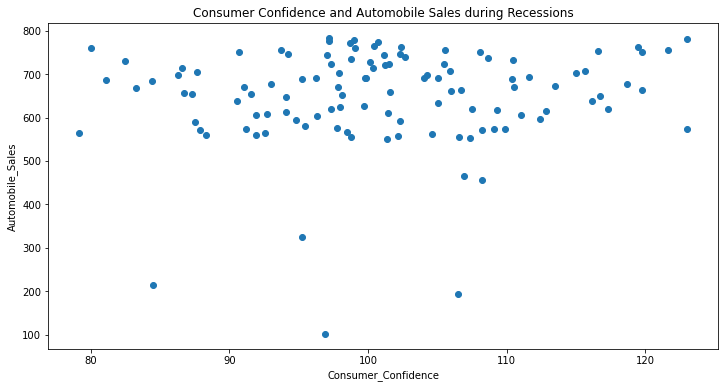

In [45]:
rec_data = df[df['Recession'] == 1]
plt.figure(figsize=(12,6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

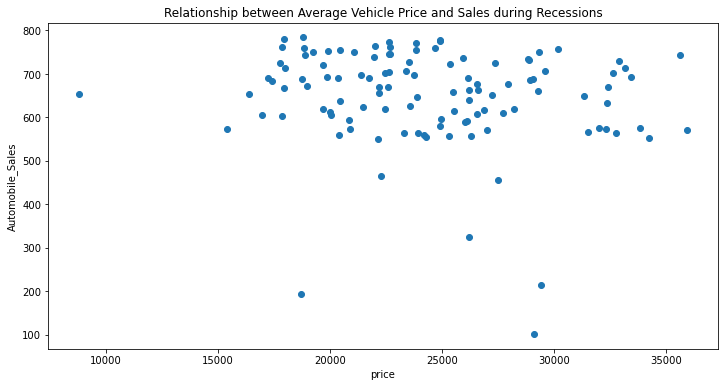

In [46]:
rec_data = df[df['Recession'] == 1]
plt.figure(figsize=(12,6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

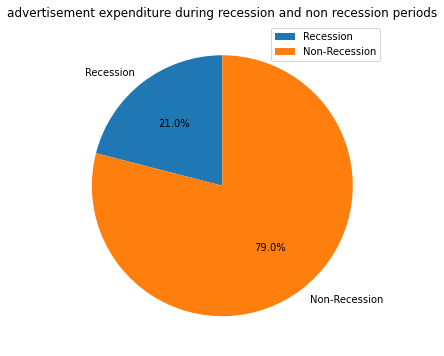

In [49]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

sum_exp = rec_data['Advertising_Expenditure'].sum()
sum_exp_non_rec = non_rec_data['Advertising_Expenditure'].sum()

plt.figure(figsize=(10, 6))

labels = ['Recession', 'Non-Recession']
sizes = [sum_exp, sum_exp_non_rec]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('advertisement expenditure during recession and non recession periods')
plt.legend()
plt.show()

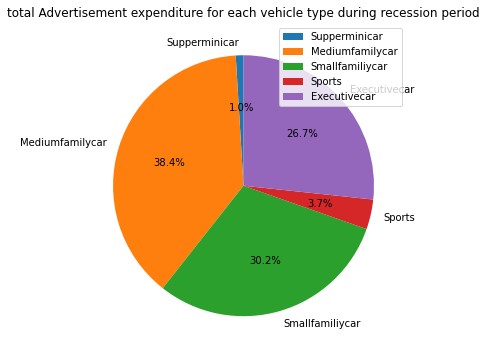

In [56]:
rec_data = df[df['Recession'] == 1]

# sum_exp = rec_data['Advertising_Expenditure'].sum()
sum_exp = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(12, 6))

labels = df['Vehicle_Type'].unique()
plt.pie(sum_exp, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('total Advertisement expenditure for each vehicle type during recession period')
plt.legend()
plt.show()

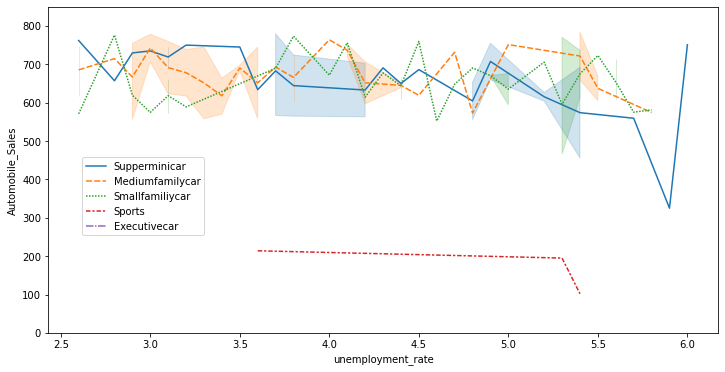

In [61]:
rec_data = df[df['Recession'] == 1]
plt.figure(figsize=(12, 6))

sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type')
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))